<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(1_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.175190,-31.681037,9.494153,44.085640,-34.591486
1,0.0,1.0,46.716156,2.131115,58.847271,60.282265,-1.434994
2,0.0,2.0,88.869409,-67.533410,31.335998,104.213923,-72.877925
3,0.0,3.0,74.764794,11.329973,96.094767,89.514248,6.580519
4,0.0,4.0,92.285066,-6.867212,95.417854,107.773683,-12.355830
...,...,...,...,...,...,...,...
249995,999.0,245.0,55.075185,5.603395,70.678580,67.751767,2.926812
249996,999.0,246.0,88.434412,36.584652,135.019064,100.386605,34.632460
249997,999.0,247.0,21.507752,29.178694,60.686446,34.913245,25.773201
249998,999.0,248.0,87.008616,-35.822029,61.186587,98.991769,-37.805183


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.175190,-31.681037,9.494153,44.085640,-34.591486
1,0.0,1.0,46.716156,2.131115,58.847271,60.282265,-1.434994
2,0.0,2.0,88.869409,-67.533410,31.335998,104.213923,-72.877925
3,0.0,3.0,74.764794,11.329973,96.094767,89.514248,6.580519
4,0.0,4.0,92.285066,-6.867212,95.417854,107.773683,-12.355830
...,...,...,...,...,...,...,...
249995,999.0,245.0,55.075185,5.603395,70.678580,67.751767,2.926812
249996,999.0,246.0,88.434412,36.584652,135.019064,100.386605,34.632460
249997,999.0,247.0,21.507752,29.178694,60.686446,34.913245,25.773201
249998,999.0,248.0,87.008616,-35.822029,61.186587,98.991769,-37.805183


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.175190 -31.681037    9.494153   44.085640 -34.591486
      1.0    46.716156   2.131115   58.847271   60.282265  -1.434994
      2.0    88.869409 -67.533410   31.335998  104.213923 -72.877925
      3.0    74.764794  11.329973   96.094767   89.514248   6.580519
      4.0    92.285066  -6.867212   95.417854  107.773683 -12.355830
...                ...        ...         ...         ...        ...
999.0 245.0  55.075185   5.603395   70.678580   67.751767   2.926812
      246.0  88.434412  36.584652  135.019064  100.386605  34.632460
      247.0  21.507752  29.178694   60.686446   34.913245  25.773201
      248.0  87.008616 -35.822029   61.186587   98.991769 -37.805183
      249.0  63.085451  18.053450   91.138901   75.588092  15.550809

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.175190 -31.681037    9.494153   44.085640 -34.591486
      1.0    46.716156   2.131115   58.847271   60.282265  -1.434994
      2.0    88.869409 -67.533410   31.335998  104.213923 -72.877925
      3.0    74.764794  11.329973   96.094767   89.514248   6.580519
      4.0    92.285066  -6.867212   95.417854  107.773683 -12.355830
...                ...        ...         ...         ...        ...
999.0 245.0  55.075185   5.603395   70.678580   67.751767   2.926812
      246.0  88.434412  36.584652  135.019064  100.386605  34.632460
      247.0  21.507752  29.178694   60.686446   34.913245  25.773201
      248.0  87.008616 -35.822029   61.186587   98.991769 -37.805183
      249.0  63.085451  18.053450   91.138901   75.588092  15.550809

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.175190,-31.681037,9.494153,44.085640,-34.591486
1,0.0,1.0,46.716156,2.131115,58.847271,60.282265,-1.434994
2,0.0,2.0,88.869409,-67.533410,31.335998,104.213923,-72.877925
3,0.0,3.0,74.764794,11.329973,96.094767,89.514248,6.580519
4,0.0,4.0,92.285066,-6.867212,95.417854,107.773683,-12.355830
...,...,...,...,...,...,...,...
249995,999.0,245.0,55.075185,5.603395,70.678580,67.751767,2.926812
249996,999.0,246.0,88.434412,36.584652,135.019064,100.386605,34.632460
249997,999.0,247.0,21.507752,29.178694,60.686446,34.913245,25.773201
249998,999.0,248.0,87.008616,-35.822029,61.186587,98.991769,-37.805183


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.175190 -31.681037    9.494153   44.085640 -34.591486
      1.0    46.716156   2.131115   58.847271   60.282265  -1.434994
      2.0    88.869409 -67.533410   31.335998  104.213923 -72.877925
      3.0    74.764794  11.329973   96.094767   89.514248   6.580519
      4.0    92.285066  -6.867212   95.417854  107.773683 -12.355830
...                ...        ...         ...         ...        ...
999.0 245.0  55.075185   5.603395   70.678580   67.751767   2.926812
      246.0  88.434412  36.584652  135.019064  100.386605  34.632460
      247.0  21.507752  29.178694   60.686446   34.913245  25.773201
      248.0  87.008616 -35.822029   61.186587   98.991769 -37.805183
      249.0  63.085451  18.053450   91.138901   75.588092  15.550809

[250000 rows x 5 columns]

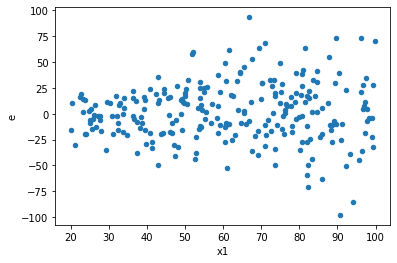

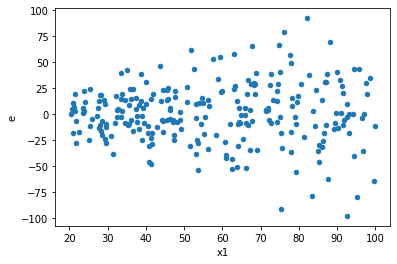

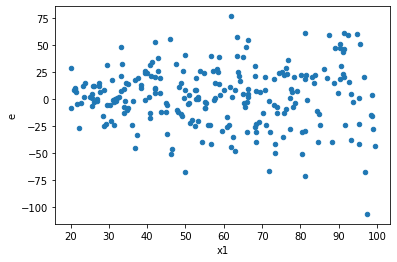

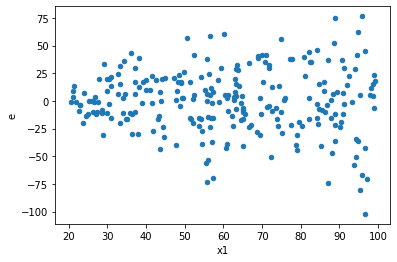

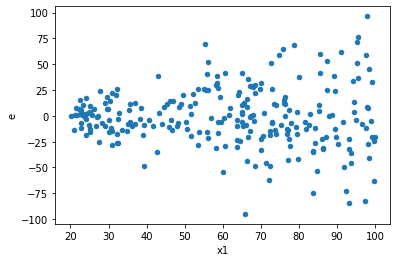

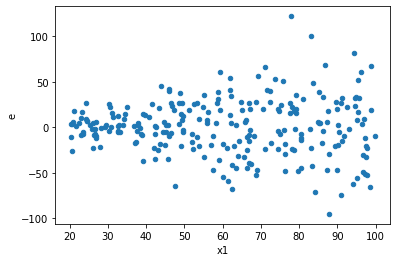

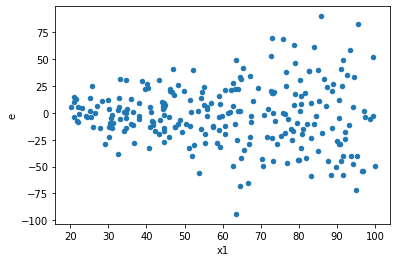

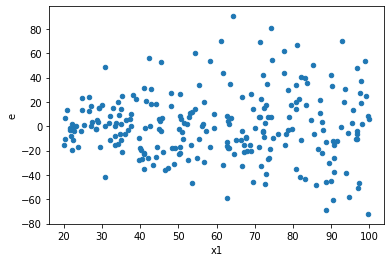

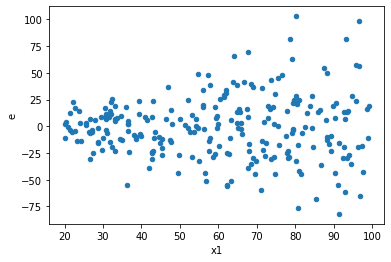

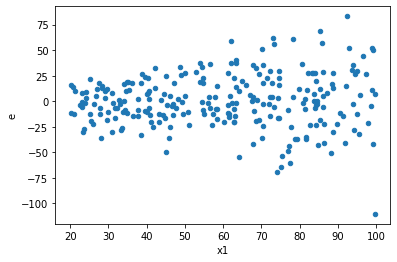

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,99.0,99.0,26908.05889768588,121642.34470878674,271.7985747240998,1228.7105526140074,4.520665915416444,7.407408020299044e-13,0.9999999999996296,3.703704010149522e-13,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,31344.494599026915,104448.01711470391,316.6110565558274,1055.0304759061,3.3322603682353353,6.37962238592138e-09,0.9999999968101888,3.18981119296069e-09,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,27021.280803691105,126144.3247414849,272.9422303403142,1274.1850983988375,4.668332550848352,2.6290081223123707e-13,0.9999999999998685,1.3145040611561853e-13,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,25197.924583700566,120765.29506978155,254.52449074445016,1219.851465351329,4.792668327450244,1.1146639167236572e-13,0.9999999999999443,5.573319583618286e-14,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,30264.51083296261,89156.50116601554,305.70212962588494,900.5707188486418,2.945909208911141,1.6118308687751437e-07,0.9999999194084566,8.059154343875718e-08,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,23587.314559959188,153835.31231666834,238.25570262585038,1553.8920436027104,6.521951107474208,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,33603.505335620954,134733.359593531,339.42934682445406,1360.9430261972827,4.009503123196754,3.106670476427098e-11,0.9999999999844666,1.553335238213549e-11,Reject005=0 : Heteroscedasticity
7.0,99.0,99.0,31437.105722747645,121182.60474505801,317.5465224519964,1224.0667145965456,3.8547634064598775,1.0093681446221581e-10,0.9999999999495316,5.0468407231107903e-11,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,41966.87925855751,128337.8299147257,423.9078712985607,1296.3417163103607,3.058074180928195,6.225913584678722e-08,0.9999999688704321,3.112956792339361e-08,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,26908.05889768588,121642.34470878674,271.7985747240998,1228.7105526140074,4.520665915416444,7.407408020299044e-13,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,31344.494599026915,104448.01711470391,316.6110565558274,1055.0304759061,3.3322603682353353,6.37962238592138e-09,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,27021.280803691105,126144.3247414849,272.9422303403142,1274.1850983988375,4.668332550848352,2.6290081223123707e-13,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,25197.924583700566,120765.29506978155,254.52449074445016,1219.851465351329,4.792668327450244,1.1146639167236572e-13,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,30264.51083296261,89156.50116601554,305.70212962588494,900.5707188486418,2.945909208911141,1.6118308687751437e-07,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,23587.314559959188,153835.31231666834,238.25570262585038,1553.8920436027104,6.521951107474208,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,33603.505335620954,134733.359593531,339.42934682445406,1360.9430261972827,4.009503123196754,3.106670476427098e-11,Reject005=0 : Heteroscedasticity
7.0,99.0,99.0,31437.105722747645,121182.60474505801,317.5465224519964,1224.0667145965456,3.8547634064598775,1.0093681446221581e-10,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,41966.87925855751,128337.8299147257,423.9078712985607,1296.3417163103607,3.058074180928195,6.225913584678722e-08,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64